In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
#warnings.filterwarnings('ignore')

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/sonar.csv

--2022-03-25 08:16:25--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/sonar.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.143.6
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.143.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [text/csv]
Saving to: ‘sonar.csv’

sonar.csv           100%[===================>]  85.72K   446KB/s    in 0.2s    

2022-03-25 08:16:25 (446 KB/s) - ‘sonar.csv’ saved [87776/87776]



In [35]:
# carico e visualizzazione dataset - assegnando "None" all'intestazione per non pedere il primo dato
df = pd.read_csv('sonar.csv', header = None) 
df
# problema di classificazione binaria target = 'R'


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [38]:
#rinomino la colonna 60 come Target
df.rename(columns={60: 'Target'}, inplace = True)

#Converto in 0 e 1 le colonne i valori della colonna target (metodo map/dizionari) evita problemi in plotting
df['Target'] = df['Target']. map({'M':0, 'R':1})

#per situazioni più complesse c'è questa alternativa con LabelEncoder di sklearn
# from sklearn.preprocessing import LabelEncoder 
# le = LabelEncoder
# df.['Target'] = le.fit_transform(df.['Target'])

In [39]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
...,...,...,...,...,...,...,...,...
56,208.0,0.007820,0.005785,0.0003,0.003700,0.00595,0.010425,0.0355
57,208.0,0.007949,0.006470,0.0003,0.003600,0.00580,0.010350,0.0440
58,208.0,0.007941,0.006181,0.0001,0.003675,0.00640,0.010325,0.0364
59,208.0,0.006507,0.005031,0.0006,0.003100,0.00530,0.008525,0.0439


In [40]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
56        0
57        0
58        0
59        0
Target    0
Length: 61, dtype: int64

In [42]:
df['Target'].value_counts()

0    111
1     97
Name: Target, dtype: int64

In [43]:
df.groupby('Target').mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Target,,,,,,,,,,,,,,,,,,,,,
0,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
1,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


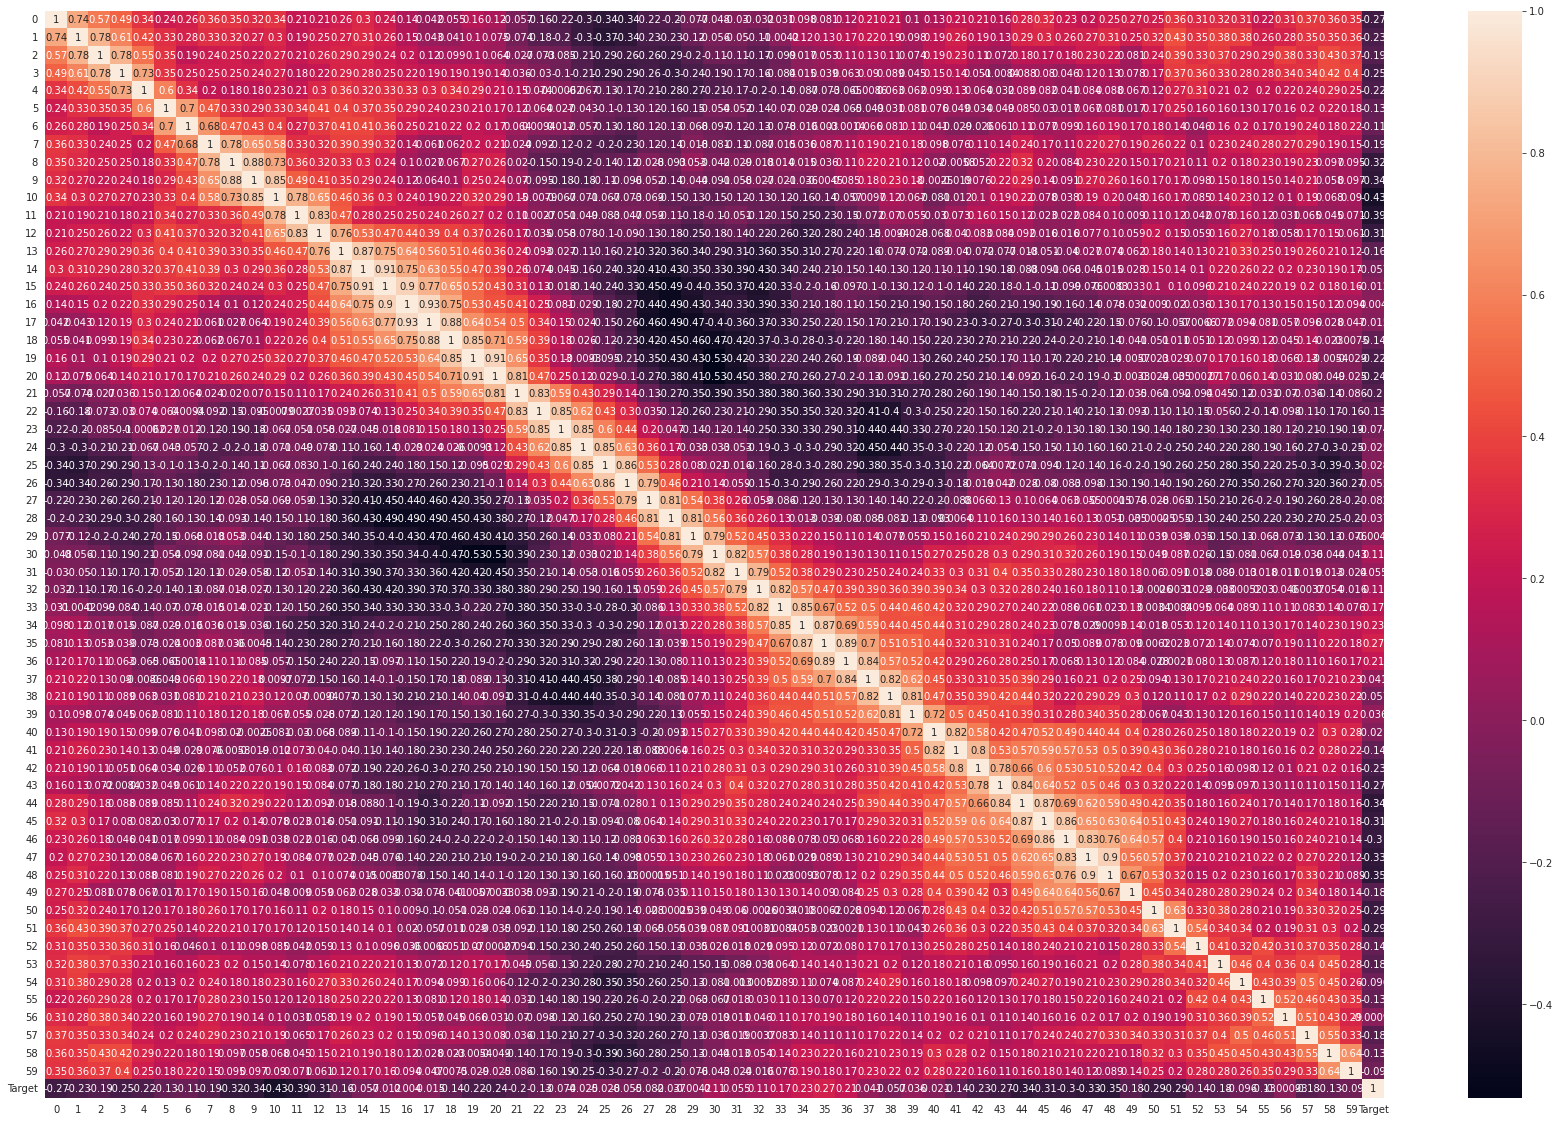

In [44]:
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

In [45]:
# separating the data and labels
X_ = df.drop(['Target'], axis=1)
y = df['Target']

In [46]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[-0.39955135 -0.04064823 -0.02692565 ...  0.06987027  0.17167808
  -0.65894689]
 [ 0.70353822  0.42163039  1.05561832 ... -0.47240644 -0.44455424
  -0.41985233]
 [-0.12922901  0.60106749  1.72340448 ...  1.30935987  0.25276128
   0.25758223]
 ...
 [ 1.00438083  0.16007801 -0.67384349 ...  0.90652575 -0.03913824
  -0.67887143]
 [ 0.04953255 -0.09539176  0.13480381 ... -0.00759783 -0.70402047
  -0.34015415]
 [-0.13794908 -0.06497869 -0.78861924 ... -0.6738235  -0.29860448
   0.99479044]]


In [47]:
X = standardized_data
y = df['Target']

In [48]:
print(X)
print(y)

[[-0.39955135 -0.04064823 -0.02692565 ...  0.06987027  0.17167808
  -0.65894689]
 [ 0.70353822  0.42163039  1.05561832 ... -0.47240644 -0.44455424
  -0.41985233]
 [-0.12922901  0.60106749  1.72340448 ...  1.30935987  0.25276128
   0.25758223]
 ...
 [ 1.00438083  0.16007801 -0.67384349 ...  0.90652575 -0.03913824
  -0.67887143]
 [ 0.04953255 -0.09539176  0.13480381 ... -0.00759783 -0.70402047
  -0.34015415]
 [-0.13794908 -0.06497869 -0.78861924 ... -0.6738235  -0.29860448
   0.99479044]]
0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Target, Length: 208, dtype: int64


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


In [51]:
classifier = LogisticRegression()

In [52]:
#training the classifier
classifier.fit(X_train, y_train)

LogisticRegression()

In [53]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [54]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8333333333333334


In [55]:
labels = ['Rock', 'Mine']

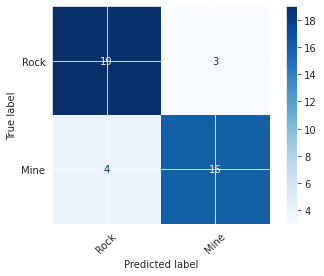

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [57]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

        Rock       0.83      0.86      0.84        22
        Mine       0.84      0.80      0.82        20

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



In [58]:
# per ROC curve

!pip install plot-metric --quiet

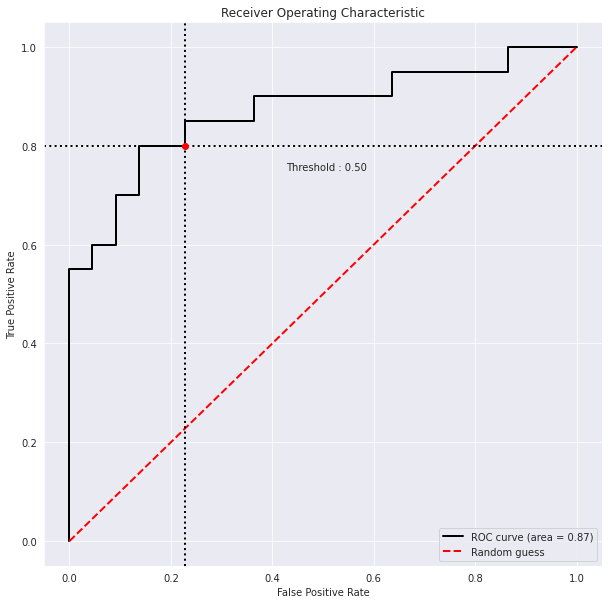

In [59]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [60]:
y_pred_proba

array([1.75746692e-04, 9.99190467e-01, 9.96135024e-01, 4.77385616e-02,
       5.54517051e-01, 1.12273905e-02, 1.11380912e-06, 2.71579948e-02,
       8.30797964e-02, 2.33850528e-01, 1.08116722e-06, 1.73931614e-02,
       9.73901697e-01, 8.73914184e-01, 4.74992080e-01, 3.87149178e-01,
       9.73896879e-01, 9.89711208e-01, 7.64110438e-01, 1.41914138e-01,
       3.47030593e-02, 7.77703425e-03, 4.91759903e-01, 9.81540826e-01,
       9.55000719e-01, 2.67044360e-01, 9.09326755e-02, 9.51104306e-01,
       9.94834386e-01, 9.88610964e-01, 5.15027251e-03, 5.00074649e-07,
       9.96027784e-01, 9.61288853e-01, 2.84581385e-01, 9.99513454e-01,
       4.15636193e-01, 9.99913147e-01, 4.15349634e-02, 9.47965491e-01,
       4.86027895e-04, 9.80218505e-01])

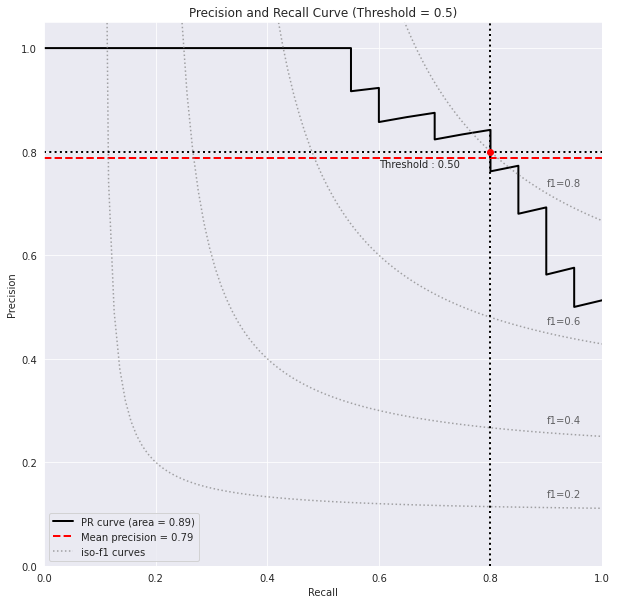

In [61]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

In [62]:
input_data = [3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('Rock')
else:
  print('Mine')

[[168.3339133  125.95764954 155.3690007   52.69968495  34.73206081
  111.51754477  79.14208394  21.95716839  27.11207222  13.3620047
   13.32465212  -1.7906851   12.27890674  -1.80747726   8.19684241
    8.7100388   13.20705626  14.28778528  21.3515296    7.39236878
    5.40805861  23.72307643  17.44187009   5.56444069  11.06904335
    5.49375188   5.29590653  -2.93309685   5.66577869  -2.63796606
    7.00553983   9.21834098  16.85685732  16.37196374  21.69146397
    8.02759173   6.83641478  29.84242197  23.5362905    9.47527726
   18.10639204  10.22863759  12.64584312  -1.60994781  11.91805936
   -1.20218967  21.64482768  37.07573539 107.00711747 305.13043594
  499.51029617 258.727661   282.43551156 915.6728161  705.84244274
  348.07274898 584.2741374  308.64080757 323.04497953  -1.29653236]]
0
Rock
